# <font color='red'>-----------------------------------------------------------------------------------------------------</font>
# <font color='blue'>Capstone Project 2 - Hotel booking Prediction</font>
## <font color='blue'>The data is related to customers likely to cancel hotel bookings or not </font>
# <font color='red'>-----------------------------------------------------------------------------------------------------</font>

## <ins><div class="alert alert-block alert-warning">*Objective: -*</div></ins>

### The goal is to make a predictive model to predict if the customer will cancel a hotel booking or not. The target variable is “is_canceled”.

### <ins><div class="alert alert-block alert-info">*Step 1: Loading all the libraries*</div></ins>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### <ins><div class="alert alert-block alert-info">*Step 2: Loading the dataset*</div></ins>

In [2]:
hot_book = pd.read_csv('hotel bookings.csv')
hot_book.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
hot_book.shape

(119390, 32)

### <ins><ins><div class="alert alert-block alert-info">*Step 3: Reading the file and getting basic information about the data*</div></ins>

- Basic information of the data

In [4]:
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 119390 entries and 32 columns in the dataset. There are null values in the dataset which we will treat. Also the dataset has mostly object, integer entries and float values

### <ins><ins><div class="alert alert-block alert-info">*Step 4: Cleaning data and Performing Exploratory Data Analysis*</div></ins>

- Finding total null values for each columns

In [5]:
hot_book.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
hot_book.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

Only three columns 'country', 'agent','company' have null values. Out of that 'company' has a huge number of null values. We will drop column 'company'. We will also remove the 'agent' & 'reservation_status_date' columns since it is not required and also 'reservation_status_date' is just the last date when the reservation status was set. Also we fill drop null values for 'country' and 'children' since excluding them will still retain 76% of the data

In [7]:
hot_book.drop(['company','agent'],axis=1,inplace=True)
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have successfully dropped the company column

- Dropping the null values

In [8]:
hot_book.dropna(subset=['country','children'],inplace=True)
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [9]:
hot_book.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
# finding sum of null values

hot_book.isnull().sum().sum()

0

We have successfully removed all  null values from the dataset

We will create variables to store the numerical values and categorical vales

In [11]:
hot_book.drop(['reservation_status_date'],axis=1,inplace=True)

In [12]:
num_features = hot_book.select_dtypes(exclude='object').columns.to_list()
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [13]:
cat_features = hot_book.select_dtypes(include='object').columns.to_list()
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [14]:
features = num_features+cat_features

In [15]:
hot_book.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   reserved_room_type  assigned_room_type booking_changes deposit_type  \
0                   C                   C               3   No Deposit   
1                   C                   C               4   No Deposit   
2                   A                   C               0   No Deposit   
3                   A                   A               0   No Deposit   
4                   A                   A               0   No Deposit   

  days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                    0     Transient   0.0                            0   
1                    0     Transient   0.0                            0   
2                    0     Transient  75.0                            0   
3                    0     Transient  75.0                            0   
4                    0     Transient  98.0                            0   

   total_of_special_requests reservation_status  
0                          0          Check-Out  
1                          0          Check-Out  
2                          0          Check-Out  
3                          0          Check-Out  
4                          1          Check-Out  

[5 rows x 29 columns]

**As per the logic understood through the given explanation of the column name the data types are now properly segregated into categories and numerical values**

In [16]:
hot_book.shape

(118898, 29)

- Let's do some other plotting for variables

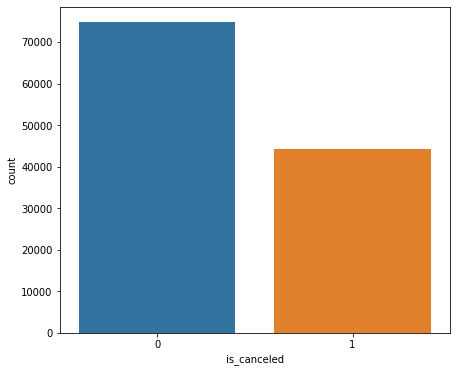

In [17]:
# plotting cancellations and non cancellations
plt.figure(figsize=(7,6))
sns.countplot(x='is_canceled',data=hot_book)
plt.show()

We have majority of cancellations as 0 means many customers didnt cancel their booking

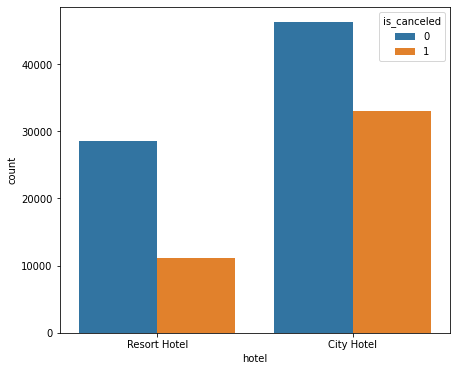

In [18]:
# plotting cancellations as per hotel typpe

plt.figure(figsize=(7,6))
sns.countplot(x='hotel', hue='is_canceled',data=hot_book)
plt.show()

Major cancellations were observed in city hotel and non cancellations were also city hotels which indicates city hotels had more bookings compared to resort hotels

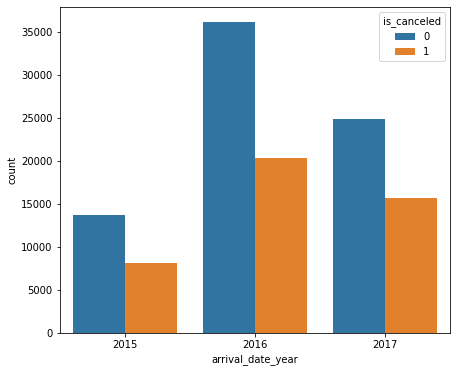

In [19]:
# plotting cancellations as per the year

plt.figure(figsize=(7,6))
sns.countplot(x='arrival_date_year', hue='is_canceled',data=hot_book)
plt.show()

We have more cancellations observed in the year 2016 than 2015 & 2017

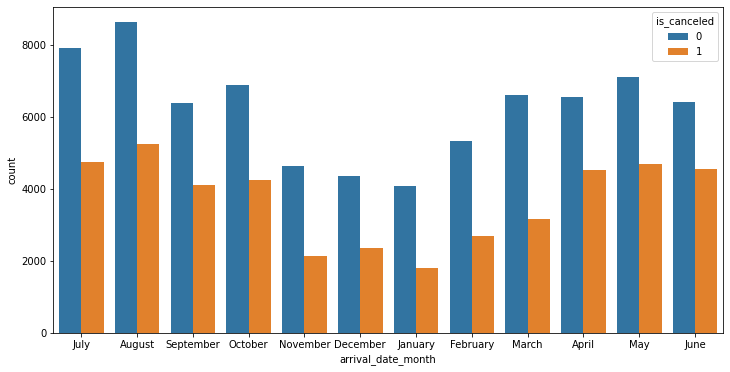

In [20]:
# plotting cancellations as per the month

plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', hue='is_canceled',data=hot_book)
plt.show()

We are seeing cancellations rising from April and then steadying between May, June & July peaking in August and then dropping off from Sept with least cancellations in Nov, Dec & Jan explaining that those are festive seasons and hence cancellations are less frequent

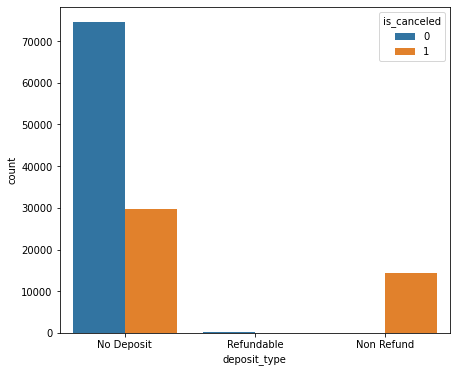

In [21]:
# plotting cancellations as per deposit

plt.figure(figsize=(7,6))
sns.countplot(x='deposit_type', hue='is_canceled',data=hot_book)
plt.show()

A majority of cancellations obviously were customers who didnt make deposits compared to non refundable deposits

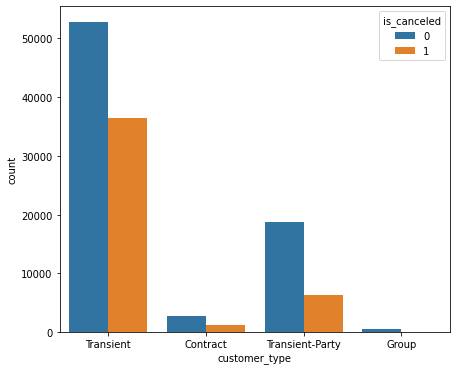

In [22]:
# plotting cancellations as per customer type

plt.figure(figsize=(7,6))
sns.countplot(x='customer_type', hue='is_canceled',data=hot_book)
plt.show()

Transient customers have the maximum cancellations and non cancellations which implies probably these type of customers are doing maximum booking 

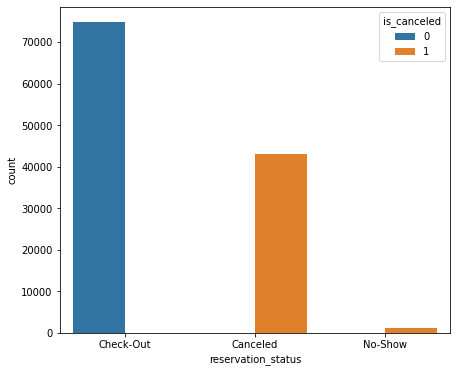

In [23]:
# plotting cancellations as per reservation_status

plt.figure(figsize=(7,6))
sns.countplot(x='reservation_status', hue='is_canceled',data=hot_book)
plt.show()

Maximum customers checked in and already checked out however a good proportion of customers cancelled their reservations. A very small percentage didnt show up and neither informed the hotel

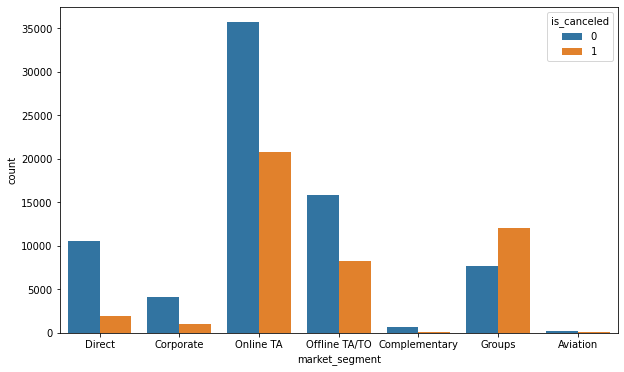

In [24]:
# plotting cancellations as per market_segment

plt.figure(figsize=(10,6))
sns.countplot(x='market_segment',hue='is_canceled',data=hot_book)
plt.show()

Most customers are observed to be Online TA and cancellations are observed to be online TA bookings compared to other groups 

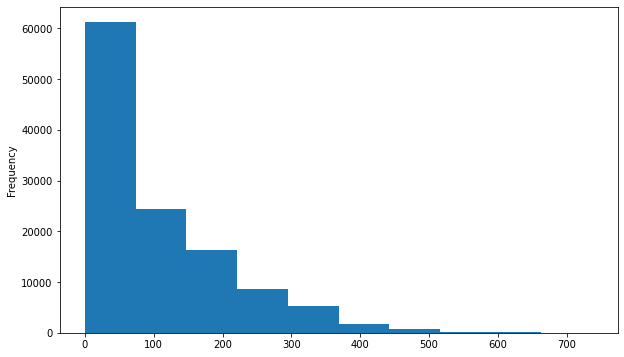

In [25]:
# plotting lead_time

plt.figure(figsize=(10,6))
hot_book['lead_time'].plot.hist()
plt.show()

As per above plot the days between booking the hotel to arrival is between 0 -100 days means major number of customers have checked in within 100 days

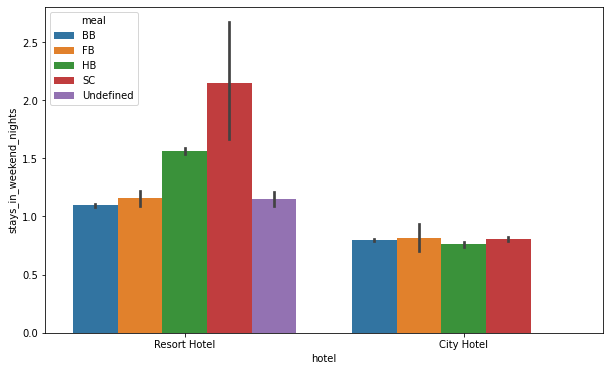

In [26]:
# plotting meals available hotel wise as per weekend stay

plt.figure(figsize=(10,6))
sns.barplot(x='hotel',y='stays_in_weekend_nights',hue='meal',data=hot_book)
plt.show()

Most resort hotels didnt have any kind of meals offered for stays during weekend nights

**We are now ready to move to model building as we have done good enough EDA**

### <ins><div class="alert alert-block alert-info">*Step 5: Creating dummy variables for model building*</div></ins>

In [27]:
features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [28]:
y = hot_book['is_canceled']

In [29]:
hot_book = hot_book[features]

In [30]:
hot_book1 = hot_book.copy()

In [31]:
hot_book1_dummy = pd.get_dummies(hot_book1, columns = cat_features,drop_first=True)
hot_book1_dummy.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ...  assigned_room_type_K  assigned_room_type_L  \
0       2       0.0       0  ...                     0                     0   
1       2       0.0       0  ...                     0                     0   
2       1       0.0       0  ...                     0                     0   
3       1       0.0       0  ...                     0                     0   
4       2       0.0       0  ...                     0                     0   

   assigned_room_type_P  deposit_type_Non Refund  deposit_type_Refundable  \
0                     0                        0                        0   
1                     0                        0                        0   
2                     0                        0                        0   
3                     0                        0                        0   
4                     0                        0                        0   

   customer_type_Group  customer_type_Transient  \
0                    0                        1   
1                    0                        1   
2                    0                        1   
3                    0                        1   
4                    0                        1   

   customer_type_Transient-Party  reservation_status_Check-Out  \
0                              0                             1   
1                              0                             1   
2                              0                             1   
3                              0                             1   
4                              0                             1   

   reservation_status_No-Show  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 247 columns]

In [32]:
hot_book1_dummy.shape

(118898, 247)

In [33]:
hot_book1 = hot_book1_dummy

In [34]:
hot_book1.shape

(118898, 247)

### <ins><div class="alert alert-block alert-info">*Step 6: Model Building pre-processing*</div></ins>

- Splitting the data into train and test set

In [35]:
# Split the dataframe into train and test sets

from sklearn.model_selection import train_test_split
X = hot_book1.loc[:,hot_book1.columns!='is_canceled']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [36]:
print('Lenght of X_train',len(X_train),'\n')
print('Lenght of X_test',len(X_test),'\n')
print('Lenght of y_train',len(y_train),'\n')
print('Lenght of y_test',len(y_test))

Lenght of X_train 83228 

Lenght of X_test 35670 

Lenght of y_train 83228 

Lenght of y_test 35670


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83228 entries, 85660 to 38872
Columns: 246 entries, lead_time to reservation_status_No-Show
dtypes: float64(2), int64(15), uint8(229)
memory usage: 29.6 MB


In [38]:
X_train.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Check-Out',
       'reservation_status_No-Show'],
      dtype='object', length=246)

### <ins><ins><div class="alert alert-block alert-info">*Step 7: Perfoming modeling*</div></ins>

- Applying the logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_model = log_reg.fit(X_train,y_train)
print('Train accuracy:',log_model.score(X_train,y_train)*100)

Train accuracy: 95.39457874753688


In [40]:
print('Test accuracy:',log_model.score(X_test,y_test)*100)

Test accuracy: 95.58172133445473


In [41]:
y_pred = log_model.predict(X_test)

In [42]:
#creating pkl file

import joblib
model_filename = 'model.pkl'
joblib.dump(log_model,model_filename)

['model.pkl']

AUC: 0.95


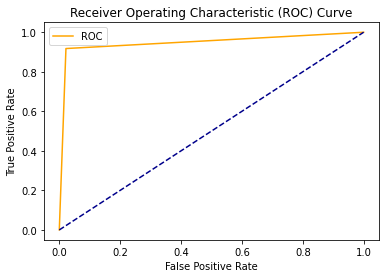

In [43]:
# plotting ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

- Creating confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[22027   492]
 [ 1084 12067]]


In [45]:
# checking accuracy score

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 95.58172133445473


In [46]:
# checking the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     22519
           1       0.96      0.92      0.94     13151

    accuracy                           0.96     35670
   macro avg       0.96      0.95      0.95     35670
weighted avg       0.96      0.96      0.96     35670



- Estimating performance of logistic regression using KFold cross validation

In [47]:
#using KFold cross validation for logistic regression
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 96.662 (0.011)


In [48]:
X_test.to_dict('records')

[{'lead_time': 23,
  'arrival_date_year': 2017,
  'arrival_date_week_number': 17,
  'arrival_date_day_of_month': 29,
  'stays_in_weekend_nights': 1,
  'stays_in_week_nights': 1,
  'adults': 2,
  'children': 2.0,
  'babies': 0,
  'is_repeated_guest': 0,
  'previous_cancellations': 0,
  'previous_bookings_not_canceled': 0,
  'booking_changes': 0,
  'days_in_waiting_list': 0,
  'adr': 125.0,
  'required_car_parking_spaces': 0,
  'total_of_special_requests': 0,
  'hotel_Resort Hotel': 1,
  'arrival_date_month_August': 0,
  'arrival_date_month_December': 0,
  'arrival_date_month_February': 0,
  'arrival_date_month_January': 0,
  'arrival_date_month_July': 0,
  'arrival_date_month_June': 0,
  'arrival_date_month_March': 0,
  'arrival_date_month_May': 0,
  'arrival_date_month_November': 0,
  'arrival_date_month_October': 0,
  'arrival_date_month_September': 0,
  'meal_FB': 0,
  'meal_HB': 0,
  'meal_SC': 0,
  'meal_Undefined': 0,
  'country_AGO': 0,
  'country_AIA': 0,
  'country_ALB': 0,
  '

From the above it is observed that model has performed quite well with Logistic regression cross validation accuracy at 96.6%

### <ins><ins><div class="alert alert-block alert-info">*Observations for the Logistic regression models*</div></ins>

- **Test accuracy and training accuracy using Logistic regression is 95%**
- **Precision, recall & accuracy of the model is again 96%,92% & 94%.**
- **Performance using KFold validation was again 96%**
- **Thus the model using Logistic regression has performed good on test set.**